## Modulos a importar:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Análisis Dataset:

Detección temprana de cáncer de mama: BreastMNIST
¿Se puede detectar la presencia de cáncer en una imagen de ecografía mamaria?

In [110]:
df = pd.read_csv("./archive/HAM10000_metadata.csv")
df = df.replace(r'^\s*$', "unknown", regex=True).fillna("NaN")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     10015 non-null  object
 1   image_id      10015 non-null  object
 2   dx            10015 non-null  object
 3   dx_type       10015 non-null  object
 4   age           10015 non-null  object
 5   sex           10015 non-null  object
 6   localization  10015 non-null  object
dtypes: object(7)
memory usage: 547.8+ KB


In [111]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [112]:
print("---------------------")
print("        UNIQUE       ")
print("-column--------count-")
print("---------------------")

print(df.nunique())

for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

---------------------
        UNIQUE       
-column--------count-
---------------------
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                19
sex                 3
localization       15
dtype: int64
lesion_id: ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']

image_id: ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']

dx: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

dx_type: ['histo' 'consensus' 'confocal' 'follow_up']

age: [80.0 75.0 60.0 70.0 55.0 85.0 65.0 40.0 50.0 45.0 35.0 0.0 30.0 'NaN' 5.0
 25.0 20.0 10.0 15.0]

sex: ['male' 'female' 'unknown']

localization: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']



In [113]:
df_clean = df[df["age"] != "NaN"]
df_clean.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [114]:
print("---------------------")
print("        UNIQUE       ")
print("-column--------count-")
print("---------------------")

print(df_clean.nunique())

for col in df_clean.columns:
    print(f"{col}: {df_clean[col].unique()}\n")

---------------------
        UNIQUE       
-column--------count-
---------------------
lesion_id       7418
image_id        9958
dx                 7
dx_type            4
age               18
sex                3
localization      15
dtype: int64
lesion_id: ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']

image_id: ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']

dx: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

dx_type: ['histo' 'consensus' 'confocal' 'follow_up']

age: [80.0 75.0 60.0 70.0 55.0 85.0 65.0 40.0 50.0 45.0 35.0 0.0 30.0 5.0 25.0
 20.0 10.0 15.0]

sex: ['male' 'female' 'unknown']

localization: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']



In [115]:
print(df_clean["age"].value_counts())
print(df_clean["localization"].value_counts())

age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: count, dtype: int64
localization
back               2192
lower extremity    2077
trunk              1403
upper extremity    1116
abdomen            1021
face                743
chest               405
foot                317
unknown             187
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


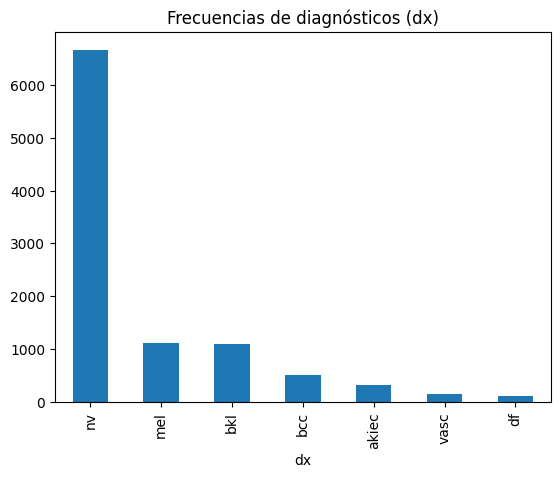

In [116]:
df_clean["dx"].value_counts().plot(kind="bar")
plt.title("Frecuencias de diagnósticos (dx)")
plt.show()

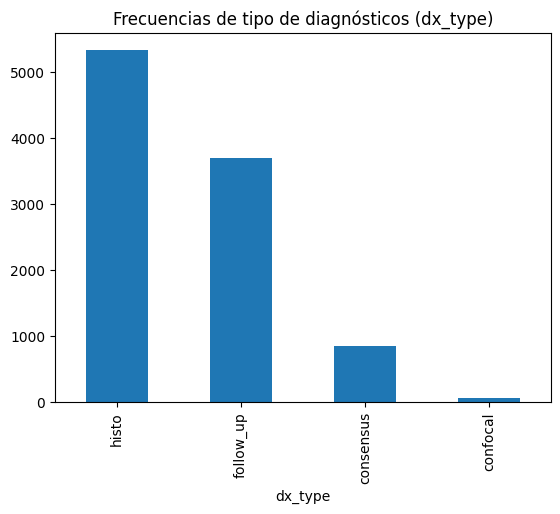

In [117]:
df_clean["dx_type"].value_counts().plot(kind="bar")
plt.title("Frecuencias de tipo de diagnósticos (dx_type)")
plt.show()

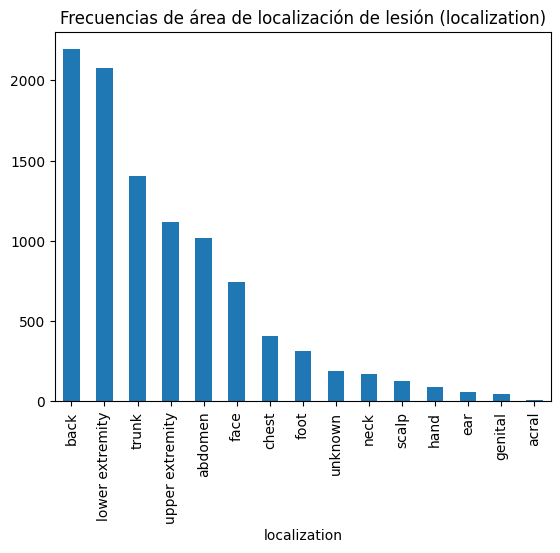

In [118]:
df_clean["localization"].value_counts().plot(kind="bar")
plt.title("Frecuencias de área de localización de lesión (localization)")
plt.show()

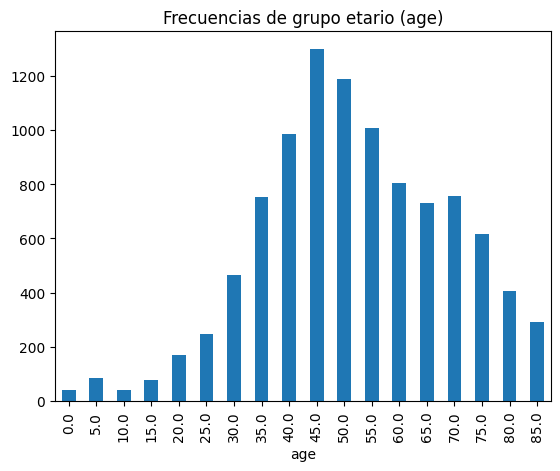

In [134]:
df_clean["age"].value_counts().sort_index().plot(kind="bar")
plt.title("Frecuencias de grupo etario (age)")
plt.show()

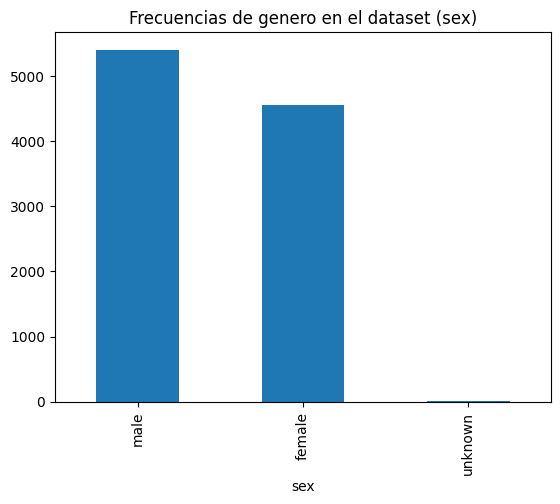

In [104]:
df_clean["sex"].value_counts().plot(kind="bar")
plt.title("Frecuencias de genero en el dataset (sex)")
plt.show()

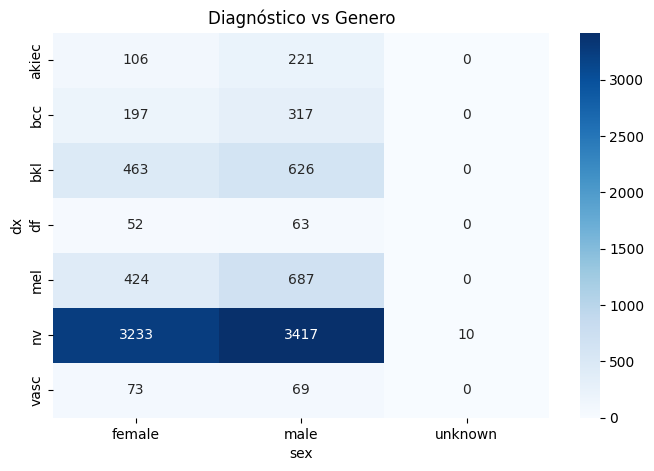

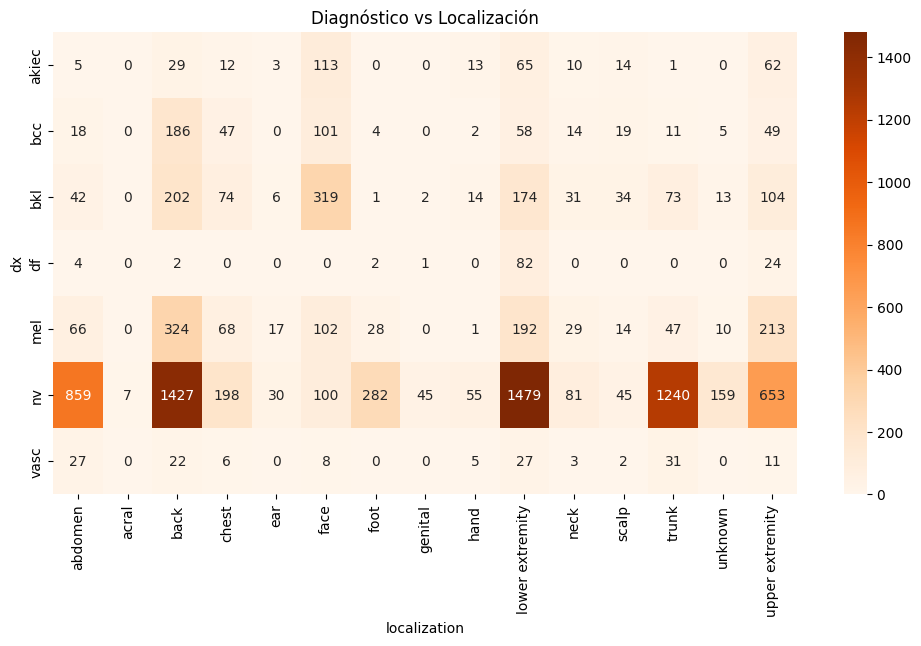

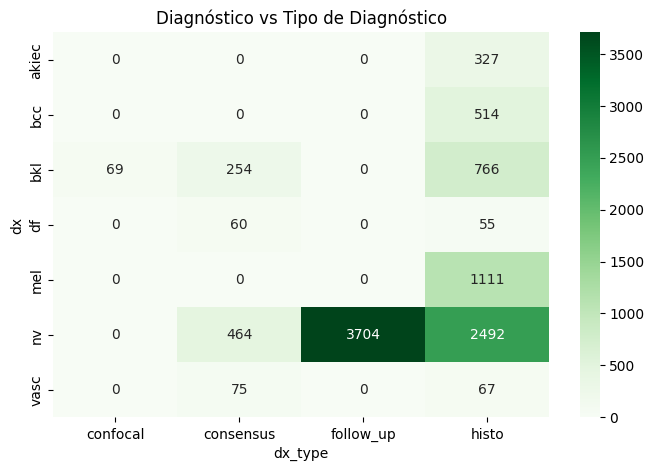

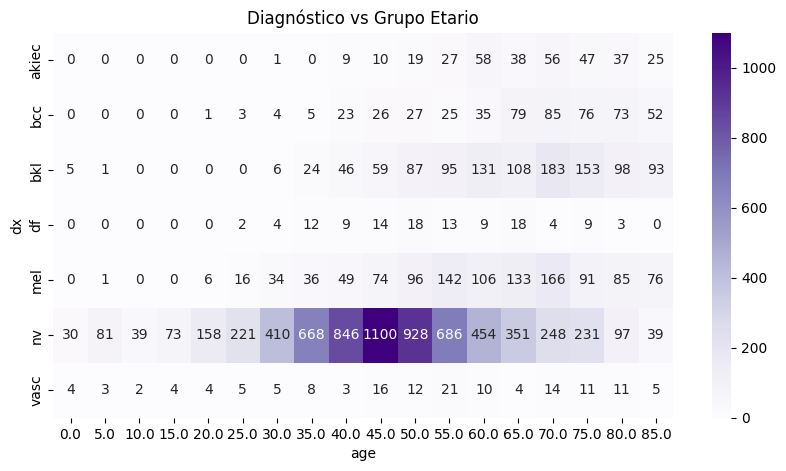

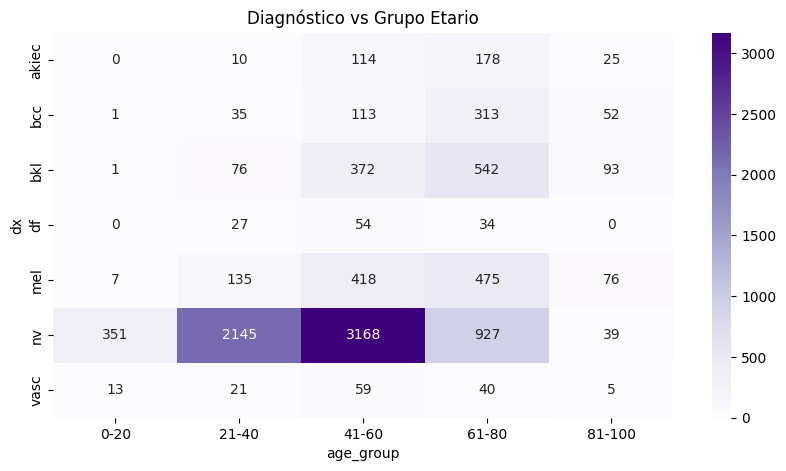

In [126]:
ct1 = pd.crosstab(df_clean["dx"], df_clean["sex"])
plt.figure(figsize=(8,5))
sns.heatmap(ct1, annot=True, fmt="d", cmap="Blues")
plt.title("Diagnóstico vs Genero")
plt.show()

ct2 = pd.crosstab(df_clean["dx"], df_clean["localization"])
plt.figure(figsize=(12,6))
sns.heatmap(ct2, annot=True, fmt="d", cmap="Oranges")
plt.title("Diagnóstico vs Localización")
plt.show()

ct3 = pd.crosstab(df_clean["dx"], df_clean["dx_type"])
plt.figure(figsize=(8,5))
sns.heatmap(ct3, annot=True, fmt="d", cmap="Greens")
plt.title("Diagnóstico vs Tipo de Diagnóstico")
plt.show()

ct4 = pd.crosstab(df_clean["dx"], df_clean["age"])
plt.figure(figsize=(10,5))
sns.heatmap(ct4, annot=True, fmt="d", cmap="Purples")
plt.title("Diagnóstico vs Grupo Etario")
plt.show()

df_grouped = df_clean.copy()
df_grouped["age_group"] = pd.cut(df_grouped["age"], bins=[0,20,40,60,80,100], labels=["0-20","21-40","41-60","61-80","81-100"])
ct5 = pd.crosstab(df_grouped["dx"], df_grouped["age_group"])
plt.figure(figsize=(10,5))
sns.heatmap(ct5, annot=True, fmt="d", cmap="Purples")
plt.title("Diagnóstico vs Grupo Etario")
plt.show()


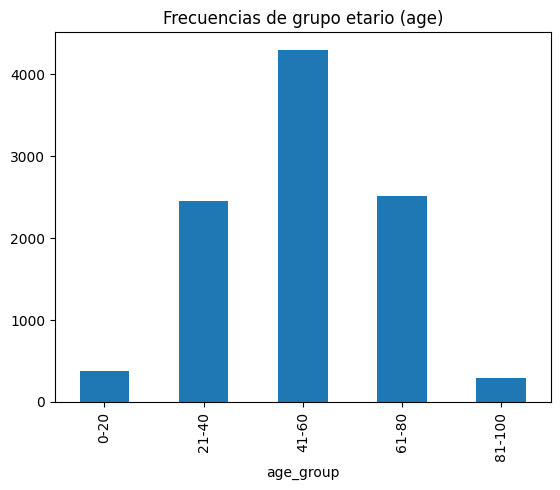

In [137]:
df_grouped["age_group"].value_counts().sort_index().plot(kind="bar")
plt.title("Frecuencias de grupo etario (age)")
plt.show()